## Experiment 2.1 

- Model: CON2D
- Data: raw0.5s
- Participant: 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Loading Data

#### Load CSV

In [2]:
df = pd.read_csv("../../data/raw_data_05s/p2.csv")
df.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Marker
0,1606.502,-1173.645,13292.984,19002.402,-7405.088,14525.393,3085.278,-1730.651,8824.737,-19760.953,22648.822,-31341.281,27139.086,55780.121,21974.738,38553.340,6864.824,0
1,1606.502,-1168.013,13292.627,19004.369,-7406.161,14521.638,3084.921,-1730.204,8822.993,-19723.357,22659.641,-31335.424,27137.723,55778.598,21998.273,38567.129,6869.742,0
2,1606.503,-1175.948,13291.487,19001.934,-7404.149,14526.242,3084.854,-1743.637,8811.817,-19716.250,22643.592,-31351.340,27133.744,55770.641,21986.920,38551.461,6863.125,0
3,1606.503,-1158.781,13307.111,19011.477,-7393.331,14537.775,3096.655,-1760.088,8809.292,-19731.203,22627.900,-31356.145,27136.135,55767.625,21963.539,38534.473,6856.264,0
4,1606.503,-1161.240,13305.055,19014.584,-7397.064,14534.043,3096.745,-1752.734,8817.986,-19714.842,22627.543,-31349.551,27140.383,55775.359,21970.559,38538.609,6857.582,0


We gonna drop the timestamps as they are not needed.  Markers will be the one indexing events, not timestamps.

In [3]:
df = df.drop(["timestamps"], axis=1)

Change channel name so they are recognizable

In [4]:
df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'C3', 'Cz', 'C4', 'T5', 'P3', 'P4',
           'T6', 'POz', 'O1', 'O2', 'Marker']   #channels named according to how we plug our eeg device
df.head()

,Fp1,Fp2,F7,F3,F4,F8,C3,Cz,C4,T5,P3,P4,T6,POz,O1,O2,Marker
0,-1173.645,13292.984,19002.402,-7405.088,14525.393,3085.278,-1730.651,8824.737,-19760.953,22648.822,-31341.281,27139.086,55780.121,21974.738,38553.340,6864.824,0
1,-1168.013,13292.627,19004.369,-7406.161,14521.638,3084.921,-1730.204,8822.993,-19723.357,22659.641,-31335.424,27137.723,55778.598,21998.273,38567.129,6869.742,0
2,-1175.948,13291.487,19001.934,-7404.149,14526.242,3084.854,-1743.637,8811.817,-19716.250,22643.592,-31351.340,27133.744,55770.641,21986.920,38551.461,6863.125,0
3,-1158.781,13307.111,19011.477,-7393.331,14537.775,3096.655,-1760.088,8809.292,-19731.203,22627.900,-31356.145,27136.135,55767.625,21963.539,38534.473,6856.264,0
4,-1161.240,13305.055,19014.584,-7397.064,14534.043,3096.745,-1752.734,8817.986,-19714.842,22627.543,-31349.551,27140.383,55775.359,21970.559,38538.609,6857.582,0


Let's look at how the marker was generated.  Here is the format:

- [block, trial, actual label] 
- actual label is 0 to 9, representing each character
- [-x, *, *] = rest between block x and x + 1 (4s)
- [0] = warmup

In [5]:
print(df['Marker'].unique())

['0' 'Training' '1,1,4' '1,2,1' '1,3,3' '1,4,5' '1,5,4' '1,6,7' '1,7,0'
 '1,8,5' '1,9,9' '1,10,2' '1,11,1' '1,12,2' '1,13,0' '1,14,7' '1,15,6'
 '1,16,4' '1,17,9' '1,18,1' '1,19,8' '1,20,3' '-1,Fixation,Fixation'
 '2,1,0' '2,2,8' '2,3,0' '2,4,3' '2,5,0' '2,6,1' '2,7,0' '2,8,8' '2,9,9'
 '2,10,8' '2,11,0' '2,12,5' '2,13,4' '2,14,6' '2,15,7' '2,16,3' '2,17,2'
 '2,18,4' '2,19,0' '2,20,4' '-2,Fixation,Fixation' '3,1,8' '3,2,4' '3,3,5'
 '3,4,2' '3,5,4' '3,6,6' '3,7,4' '3,8,7' '3,9,4' '3,10,5' '3,11,3'
 '3,12,2' '3,13,5' '3,14,8' '3,15,7' '3,16,1' '3,17,3' '3,18,0' '3,19,8'
 '3,20,9' '-3,Fixation,Fixation' '4,1,2' '4,2,5' '4,3,6' '4,4,7' '4,5,1'
 '4,6,8' '4,7,1' '4,8,8' '4,9,2' '4,10,8' '4,11,7' '4,12,4' '4,13,0'
 '4,14,6' '4,15,9' '4,16,3' '4,17,2' '4,18,8' '4,19,9' '4,20,4'
 '-4,Fixation,Fixation' '5,1,0' '5,2,5' '5,3,0' '5,4,5' '5,5,8' '5,6,5'
 '5,7,1' '5,8,2' '5,9,1' '5,10,4' '5,11,1' '5,12,8' '5,13,1' '5,14,3'
 '5,15,8' '5,16,4' '5,17,1' '5,18,7' '5,19,4' '5,20,9'
 '-5,Fixation,Fixation' 

Since we set our marker to have three info: #block, #trial, and class.  We gonna split and get the class for the markers.   **Note that we shall reserve 0 for no event for raw mne, thus we shall represent class 0-9 using label 1-10.**

In [6]:
#use numpy as another view of the pandas columns for faster operation
marker_np = df['Marker'].values

for idx, marker in enumerate(marker_np):
    if "Fixation" in marker:
        marker_np[idx] = 0
    elif "," in marker:
        #we reserved 0 for no event, so class 0-9 will be represented as 1-10 instead
        marker_np[idx] = int(marker.split(",")[-1]) + 1   
    else:
        marker_np[idx] = 0
    
#check whether df['Marker'] changed according to np
print(df['Marker'].unique())

[0 5 2 4 6 8 1 10 3 7 9]


Make sure we have 10 batch (this may vary according to your experiment) for each characters.  But for no events, it should be a lot.

In [7]:
print(df.groupby('Marker').nunique())

          Fp1    Fp2     F7     F3     F4     F8     C3     Cz     C4     T5  \
Marker                                                                         
0       60349  51924  71658  68307  68461  69017  59577  45841  72277  60247   
1          50     50     50     50     50     50     50     50     50     50   
2          50     50     50     50     50     50     50     50     50     50   
3          50     50     50     50     50     50     50     50     50     50   
4          50     50     50     50     50     50     50     50     50     50   
5          50     50     50     50     50     50     50     50     50     50   
6          50     50     50     50     50     50     50     50     50     50   
7          50     50     50     50     50     50     50     50     50     50   
8          50     50     50     50     50     50     50     50     50     50   
9          50     50     50     50     50     50     50     50     50     50   
10         50     50     50     50     5

### 2. Artifact Removal

Artifacts that are restricted to a narrow frequency range can sometimes be repaired by filtering the data. Two examples of frequency-restricted artifacts are slow drifts and power line noise. Here we illustrate how each of these can be repaired by filtering.

But first we gonna use Python MNE as it provides many useful methods for achieving these tasks.  So first, we gonna transform our pandas to mne type.  Here is the function transforming df to raw mne.

In [8]:
import mne
from mne import create_info
from mne.io import RawArray

def df_to_raw(df):
    sfreq = 125
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

Transform df to raw mne.

Creating RawArray with float64 data, n_channels=17, n_times=76692
    Range : 0 ... 76691 =      0.000 ...   613.528 secs
Ready.
Effective window size : 16.384 (s)


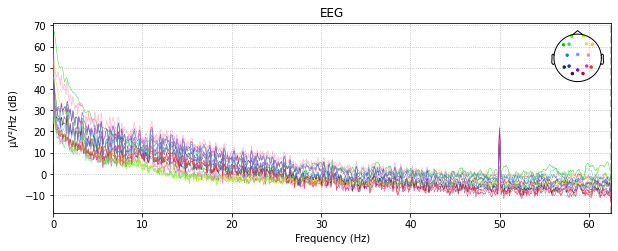

In [9]:
raw = df_to_raw(df)

#### 1. Power line noise

Some artifacts are restricted to certain frequencies and can therefore be fixed by filtering. An artifact that typically affects only some frequencies is due to the power line.

Power-line noise is a noise created by the electrical network. It is composed of sharp peaks at 50Hz (or 60Hz depending on your geographical location). Some peaks may also be present at the harmonic frequencies, i.e. the integer multiples of the power-line frequency, e.g. 100Hz, 150Hz, … (or 120Hz, 180Hz, …).

Remove the 50Hz power line noise in Thailand.  We will also be remove its harmonics, i.e., 100Hz, 150Hz, etc.  Since our signal is 62.5Hz (125Hz / 2 according to Nyquist Theorem), we don't need to run the harmonics but simply notch the 50Hz signal.

In [10]:
raw.notch_filter(50, filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)



<RawArray | 17 x 76692 (613.5 s), ~10.0 MB, data loaded>

Effective window size : 16.384 (s)


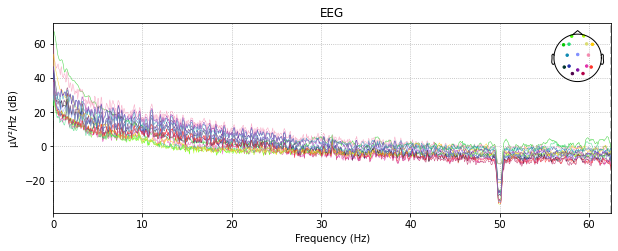

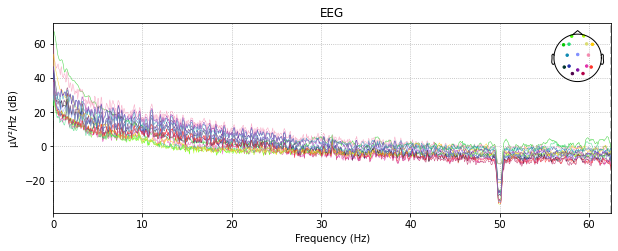

In [11]:
#observe that the 50Hz noise is now gone, yay!
raw.plot_psd()

#### 2. Slow drift

Low-frequency drifts in raw data can usually be spotted by plotting a fairly long span of data with the plot() method, though it is helpful to disable channel-wise DC shift correction to make slow drifts more readily visible. Here we plot 900 seconds (since we perform a 15 minutes experiment), showing all the eeg channels:

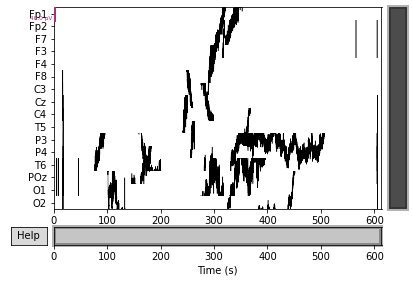

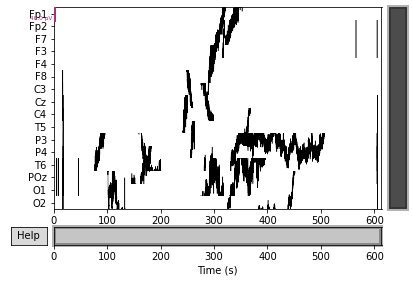

In [12]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=900, order=eeg_channels)

Notice that there are a lot of vertical black lines.  Those are drifts.  We can usually remove using low frequency high pass filter.  Here let's try 0.1, 0.2 and 1 Hz.

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



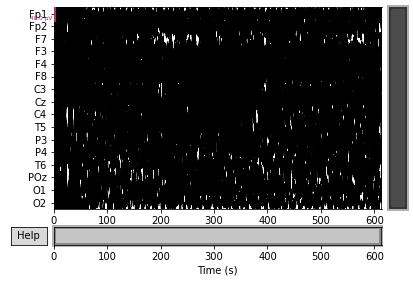

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



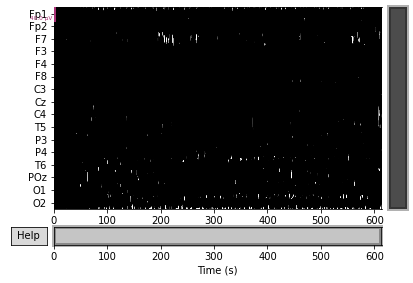

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



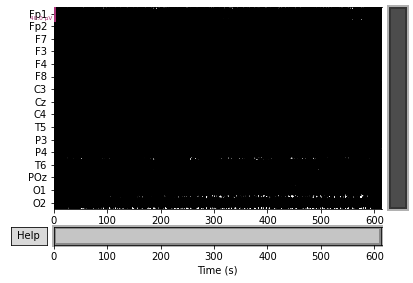

In [13]:
for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=900, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

Looks like 1Hz was quite quite good to fully remove the slow drifts. Usually, 1Hz is a good measure since most of the brain frequency lies around 1 to 40Hz.  Given that, we shall filter our brain signal to 1 to 40Hz.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


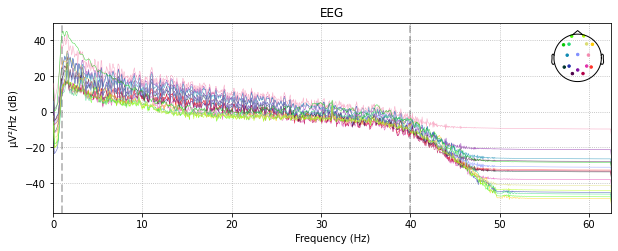

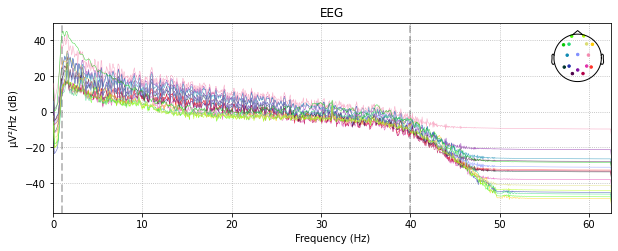

In [14]:
raw.filter(1, 40, method='iir')

raw.plot_psd()

#### 3. Independent component analysis

Independent components analysis (ICA) is a technique for estimating independent source signals from a set of recordings in which the source signals were mixed together in unknown ratios. A common example of this is the problem of blind source separation: with 3 musical instruments playing in the same room, and 3 microphones recording the performance (each picking up all 3 instruments, but at varying levels), can you somehow “unmix” the signals recorded by the 3 microphones so that you end up with a separate “recording” isolating the sound of each instrument?

It is not hard to see how this analogy applies to EEG/MEG analysis: there are many “microphones” (sensor channels) simultaneously recording many “instruments” (blinks, heartbeats, activity in different areas of the brain, muscular activity from jaw clenching or swallowing, etc). As long as these various source signals are statistically independent and non-gaussian, it is usually possible to separate the sources using ICA, and then re-construct the sensor signals after excluding the sources that are unwanted.

MNE-Python implements three different ICA algorithms: fastica (the default), picard, and infomax. FastICA and Infomax are both in fairly widespread use; Picard is a newer (2017) algorithm that is expected to converge faster than FastICA and Infomax, and is more robust than other algorithms in cases where the sources are not completely independent, which typically happens with real EEG/MEG data

The ICA interface in MNE-Python is similar to the interface in scikit-learn: some general parameters are specified when creating an ICA object, then the ICA object is fit to the data using its fit() method. The results of the fitting are added to the ICA object as attributes that end in an underscore (_), such as ica.mixing_matrix_ and ica.unmixing_matrix_. After fitting, the ICA component(s) that you want to remove must be chosen, and the ICA fit must then be applied to the Raw or Epochs object using the ICA object’s apply() method.

After visualizing the Independent Components (ICs) and excluding any that capture artifacts you want to repair, the sensor signal can be reconstructed using the ICA object’s apply() method. By default, signal reconstruction uses all of the ICs (less any ICs listed in ICA.exclude) plus all of the PCs that were not included in the ICA decomposition (i.e., the “PCA residual”). If you want to reduce the number of components used at the reconstruction stage, it is controlled by the n_pca_components parameter (which will in turn reduce the rank of your data; by default n_pca_components = max_pca_components resulting in no additional dimensionality reduction). 

Before we run the ICA, an important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit. The slow drifts are problematic because they reduce the independence of the assumed-to-be-independent sources (e.g., during a slow upward drift, the neural, heartbeat, blink, and other muscular sources will all tend to have higher values), making it harder for the algorithm to find an accurate solution. **A high-pass filter with 1 Hz cutoff frequency is recommended before performing ICA.  However when we transform ICA (signal reconstruction), we reconstruct based on the original signal that did not perform 1Hz cutoff.** However, because filtering is a linear operation, the ICA solution found from the filtered signal can be applied to the unfiltered signal, so we’ll keep a copy of the unfiltered Raw object around so we can apply the ICA solution to it later.

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)

Effective window size : 16.384 (s)


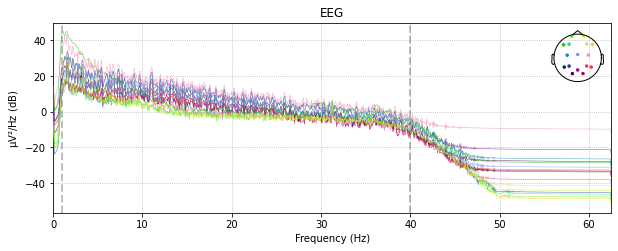

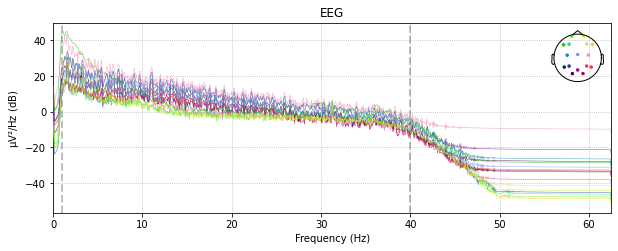

In [15]:
#filtering to remove slow drifts; also make copy of raw for later signal reconstruction
from mne.preprocessing import ICA

filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)
filt_raw.plot_psd()

Now we’re ready to set up and fit the ICA. **We’ll run ICA with n_components=16 since we only have 16 channels.**  If we have more, then we may pick a smaller number.  How small?  There is no answer, but clearly, we want to try until we can see the eye, muscle components, etc.  But too large the component will slow the fit() process.

ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this file is run.

In [16]:
# set up and fit the ICA
ica = ICA(n_components=16, random_state=32)
ica.fit(filt_raw)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 3.0s.


<ICA | raw data decomposition, fit (fastica): 76692 samples, 16 components, channels used: "eeg">

Now we can examine the ICs to see what they captured. plot_sources() will show the time series of the ICs. Note that in our call to plot_sources() we can use the original, unfiltered Raw object:

Creating RawArray with float64 data, n_channels=16, n_times=76692
    Range : 0 ... 76691 =      0.000 ...   613.528 secs
Ready.


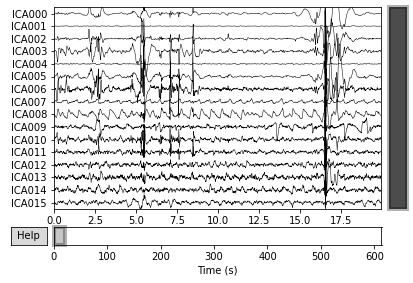

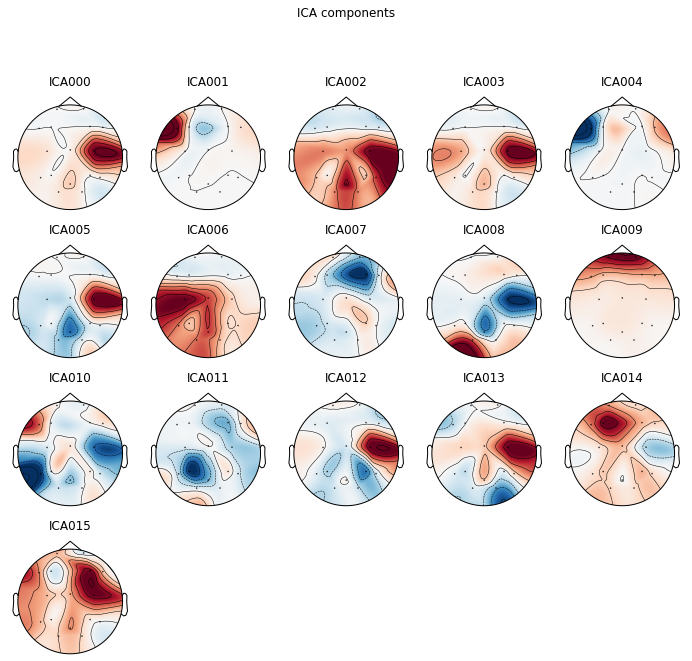

[<Figure size 702x678.24 with 16 Axes>]

In [17]:
ica.plot_sources(filt_raw)
ica.plot_components()

From the picture above, component 0 and 1 are suspicious of eye artifact. The time series shows that the first component is quite stable which is not indicative of brain components.  The time series also shows that the second component feels like it is a eye component.   For details how to look at this, please refer to https://labeling.ucsd.edu/tutorial/labels.   We shall plot the properties of ICA component 0 and 1 more closely.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
306 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
306 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


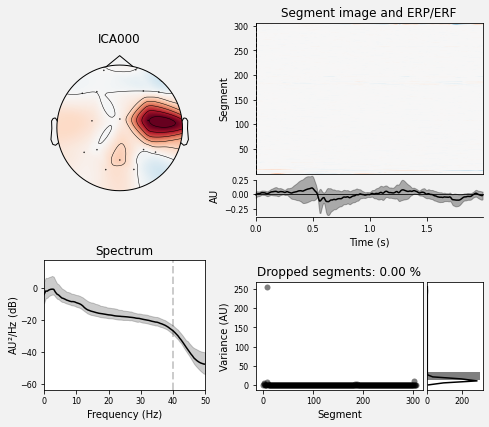

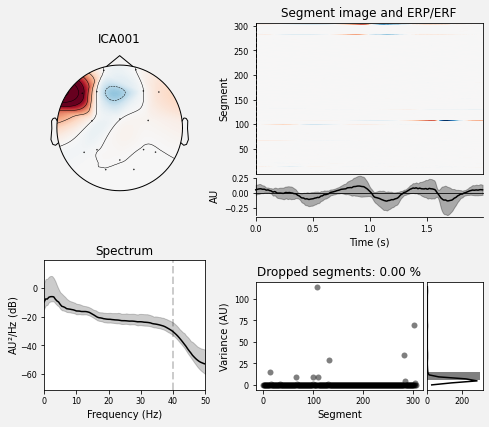

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [18]:
ica.plot_properties(filt_raw, picks=[0, 1])

Clearly, looking at the time series data, the first component is definitely not a brain component.  It could be due to the fault of the device or the setup.  For the second component, it is not straightforward as typically eye artifacts are mostly spikes, but here it looks like a mix of brain and eye.  

For more in-depth analysis, we can alo plot an overlay of the original signal against the reconstructed signal with the artifactual ICs excluded, using plot_overlay():

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components


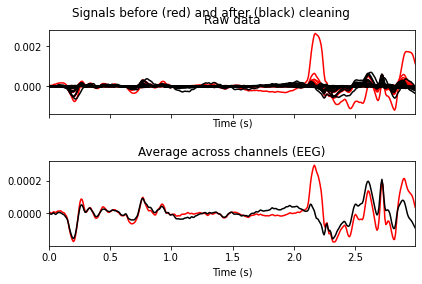

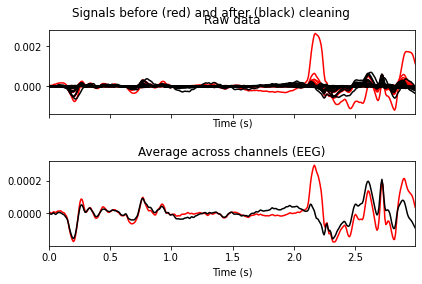

In [19]:
#test excluding 0, 1 component
ica.plot_overlay(filt_raw, exclude=[0, 1], picks='eeg')

Seems like removing component 0 does not even change the signal, meaning that component 0 can be safely removed.  Removing component 1 also seems to help removing the big spike thus is recommended.

Once we’re certain which components we want to exclude, we can specify that manually by setting the **ica.exclude** attribute. Similar to marking bad channels, merely setting ica.exclude doesn’t do anything immediately (it just adds the excluded ICs to a list that will get used later when it’s needed). Once the exclusions have been set, ICA methods like plot_overlay() will exclude those component(s) even if no exclude parameter is passed, and the list of excluded components will be preserved when using mne.preprocessing.ICA.save() and mne.preprocessing.read_ica().

In [20]:
# ica.exclude = [0, 1] #we want to cut down the 0, 1 component, then apply(self) to reconstruct the signal

Once we’re confident about which component(s) we want to remove, we pass them as the exclude parameter and then apply the ICA to the raw signal. The apply() method requires the raw data to be loaded into memory (by default it’s only read from disk as-needed), so we’ll use load_data() first. We’ll also make a copy of the Raw object so we can compare the signal before and after artifact removal side-by-side:

In [ ]:
# ica.apply() changes the Raw object in-place, so let's make a copy first for comparison:
orig_raw = raw.copy()  #we apply ica to raw
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (16 components)


Let's plot the original raw against the filtered raw

In [ ]:
orig_raw.plot(order=eeg_channels, duration=20)
raw.plot(order=eeg_channels, duration=20)

### 3. Epoching

Epoching is a process of extracting only the relevant EEG data when the event happens.  Here we shall extract -0.1 seconds before the event starts until 0.5 seconds after the event starts.  Here we choose 0.5 seconds because we knew that our stimuli stay on for 0.5 seconds after the event starts.

In [ ]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw)
    
    #reject_criteria = dict(mag=4000e-15,     # 4000 fT
    #                       grad=4000e-13,    # 4000 fT/cm
    #                       eeg=100e-6,       # 150 μV
    #                       eog=250e-6)       # 250 μV

    reject_criteria = dict(eeg=100e-6)  #most voltage in this range is not brain components

    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [ ]:
#this one requires expertise to specify the right tmin, tmax
event_id = {'0': 1, '1' : 2, '2': 3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10}
tmin = -0.1 #0
tmax = 0.5 #0.5 seconds
picks= eeg_channels
epochs = getEpochs(raw, event_id, tmin, tmax, picks)
#print(epochs.get_data())

Let's get our X and y in numpy form. Here X should have shape of (batch, channels, and samples) and y should have shape of (batch, ).   For the order of dimensions, we shall worry later on, depending on what deep learning libraries we use.

For calculate of samples, since we get 0.5 seconds after 0.1 seconds before, and our sampling rate is 125, thus the total sample is 0.6 * 125 = 75.

In [ ]:
X = epochs.get_data()
y = epochs.events[:, -1]

print(X.shape)
print(y.shape)

In [ ]:
### Plot
data = X.reshape(-1,16)
print(data.shape)
fig, ax = plt.subplots(16,1,figsize=(20,20),sharex=True)

for i in range(data.shape[1]):
    ax[i].plot(range(data.shape[0]),data[:,i])

#### Select certain electodes

In [ ]:
#### 6-8 central electrodes
# print(X.shape)
# X = X[:,6:9,:]

In [ ]:
print(X.shape)

### 4. Spectogram

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import clear_output
import time
import matplotlib

In [ ]:
data = X
label = y
print(data.shape)

In [ ]:
data_spectogram = np.zeros((data.shape[0],data.shape[1],8,75))
# 8 is the number of frequency bin
print(data_spectogram.shape)

In [ ]:
fs = 125
nperseg = 15
noverlap = 14
window = 'hann'

for m in range(data.shape[0]):
    for channel in range(data.shape[1]):
        x = data[m,channel,:]

        clear_output(wait=True)
        #y axis = fs/2
        #nperseg = width of yout chunk on the graph
        #15 temporal bins per segment
        f, t, Zxx = signal.stft(x, fs = fs, nperseg=nperseg,noverlap=noverlap)

        data_spectogram[m,channel,:,:] = np.abs(Zxx) #or np.abs(Zxx)
        #time.sleep(1)

In [ ]:
print(data_spectogram.shape)
# print(data_spectogram)

### 4.1 When wish to plot

In [ ]:
# fs = 125
# N = data[1,1,:].shape[0]
# time_0 = np.arange(N) / float(fs)

# for m in range(data.shape[0]):
#     fig,ax = plt.subplots(17,1,figsize=(20,20))
#     for channel in range(data.shape[1]):
#         x = data[m,channel,:]
        
#         clear_output(wait=True)
#         f, t, Zxx = signal.stft(x, fs = 125, nperseg=nperseg,noverlap=noverlap)

#         ax[channel].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(x),shading='auto') #np.log(np.abs(Zxx)), vmin=np.min(x)
#         ax[channel].set_ylabel(str(channel))

#     ax[16].plot(time_0,x)
    
#    # print(Zxx.shape)
#     plt.show()
#     #time.sleep(0.1)

In [ ]:
print(data_spectogram.shape)

### 5. Define Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Conv2D(nn.Module):
    '''
    Expected Input Shape: (batch, channels, height , width)
    '''
    def __init__(self):
        super(Conv2D, self).__init__()    
        self.conv1 = nn.Sequential(nn.Conv2d(16,32,kernel_size=(3,3),stride=(1,5)),nn.ReLU())
#         self.conv2 = nn.Sequential(nn.Conv2d(32,64,kernel_size=(1,9),stride=(1,5)),nn.ReLU())
#         self.conv3 = nn.Sequential(nn.Conv2d(64,128,kernel_size=(1,2),stride=(1,5)),nn.ReLU())
#         self.conv4 = nn.Sequential(nn.Conv2d(128,256,kernel_size=(1,1),stride=(1,8)),nn.ReLU())
        self.fc = nn.Sequential(nn.Linear(2880,512),nn.ReLU(),nn.Dropout(0.1),
                               nn.Linear(512,250),nn.ReLU(),nn.Dropout(0.1),
                               nn.Linear(250,125),nn.ReLU(),nn.Dropout(0.1),
                               nn.Linear(125,50),nn.ReLU(),nn.Dropout(0.1),
                               nn.Linear(50,10),nn.Dropout(0.1))
#                                nn.Linear(),nn.ReLU()) 
#                                nn.Linear(50000,1000),nn.ReLU(),
#                                nn.Linear(1000,10),nn.ReLU(),)
#         self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self,x):
        x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
        x = x.flatten(start_dim = 1)
        x = self.fc(x)
#         x = self.softmax(x)
        return x

Define the model

In [ ]:
#CON2D
model_conv2d = Conv2D()
model_conv2d = model_conv2d.float() #define precision as float to reduce running time

models = [model_conv2d]

Count the parameters for writing papers

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

for model in models:
    print(f'The model {type(model).__name__} has {count_parameters(model):,} trainable parameters')# Train the model


### 6. Training

Define optimizer and loss function

In [ ]:
import torch.optim as optim

learning_rate = 0.001

# optimizer = optim.Adam(model.parameters())
# criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

##### NOTE: little strange, when use nn.CrossEntropyLoss(), the model seems to predict more unique classes.

Put them into GPU if possible

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Configured device: ", device)

In [ ]:
for model in models:
    model = model.to(device)
criterion = criterion.to(device)

Prepare X and y in correct shape

For X, pytorch (if set batch_first) LSTM requires to be (batch, seq_len, features).  Thus, for us, it should be (100, 75, 16).

For y, nothing is special

So let's convert our numpy to pytorch, and then reshape using view

In [ ]:
torch_X = torch.from_numpy(data_spectogram)
torch_y = torch.from_numpy(y)

In [ ]:
#convert back to class 0 to 9
torch_y = torch_y-1

In [ ]:
print("Original X: ", torch_X.size())

Since it is already in the correct shape, there is no need to reshape

In [ ]:
# torch_X_reshaped = torch_X.permute(0, 2, 1)
# print("Converted X: ", torch_X_reshaped.size())
torch_X_reshaped = torch_X

Split test train set, and load them into a DataLoader

In [ ]:
from torch.utils.data import TensorDataset

# Define dataset
ds = TensorDataset(torch_X_reshaped, torch_y)

#Train test split
train_size = int(torch_X_reshaped.size()[0] * 0.7)
valid_size = int(torch_X_reshaped.size()[0] * 0.2)
test_size = int(torch_X_reshaped.size()[0] * 0.1)

train_set, valid_set, test_set = torch.utils.data.random_split(ds, [train_size, valid_size, test_size])

BATCH_SIZE = 64 #keeping it binary so it fits GPU
#Train set loader
train_iterator = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)
#Validation set loader
valid_iterator = torch.utils.data.DataLoader(dataset=valid_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

#Test set loader
test_iterator = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True)

Define the training process

We set `model.train()` so dropout is applied.

In [ ]:
def train(model, iterator, optimizer, criterion):
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    predicteds = []

    trues = []
    
    model.train()
    
    for batch, labels in iterator:
        
        #Move tensors to the configured device
        batch = batch.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(batch.float())
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        #check accuracy
        predictions = model(batch.float())
        _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
        print('================== Predicted y ====================')
        print(predicted)
        predicteds.append(predicted)
        total += labels.size(0)  #keep track of total
        correct += (predicted == labels).sum().item()  #.item() give the raw number
        print('==================    True y   ====================')
        print(labels)
        trues.append(labels)
        acc = 100 * (correct / total)
                
        epoch_loss += loss.item()
        epoch_acc = acc
        
    return epoch_loss / len(iterator), epoch_acc, predicteds, trues

We define a function for testing our model. We wet `model.eval()` since we do not use dropout.

In [ ]:
def evaluate(model, iterator, criterion):
    
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    predicteds = []
    trues = []
    
    model.eval()
    
    with torch.no_grad():
    
        for batch, labels in iterator:
            
            #Move tensors to the configured device
            batch = batch.to(device)
            labels = labels.to(device)

            predictions = model(batch.float())
            loss = criterion(predictions, labels)

            _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
            predicteds.append(predicted)
            trues.append(labels)
            total += labels.size(0)  #keep track of total
            correct += (predicted == labels).sum().item()  #.item() give the raw number
            acc = 100 * (correct / total)
            
            epoch_loss += loss.item()
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator),predicteds, trues

We will also define a time function useful for calculating time

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
print(y.shape)

Finally, we train our model.

In [ ]:
N_EPOCHS = 200

best_valid_loss = float('inf')

train_losses = []
valid_losses = []

train_accs = []
valid_accs = []

train_predicted_labels = []
valid_predicted_labels = []

train_true_labels = []
valid_true_labels = []

for i, model in enumerate(models):
    print(f"Training {type(model).__name__}")
    
    start_time = time.time()

    for epoch in range(N_EPOCHS):
        start_time = time.time()

        train_loss, train_acc, train_pred_label, train_true_label = train(model, train_iterator, optimizer, criterion)
        valid_loss, valid_acc, valid_pred_label, valid_true_label= evaluate(model, valid_iterator, criterion)
        train_losses.append(train_loss); train_accs.append(train_acc); train_predicted_labels.append(train_pred_label); train_true_labels.append(train_true_label)
        valid_losses.append(valid_loss); valid_accs.append(valid_acc); valid_predicted_labels.append(valid_pred_label); valid_true_labels.append(valid_true_label)

        end_time = time.time()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
        if (epoch+1) % 5 == 0:
            clear_output(wait=True)
            print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
            print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
            print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc:.2f}%')

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            print("Model:{} saved.".format(type(model).__name__))
            torch.save(model.state_dict(), f'../notebooks_beau/{type(model).__name__}{i}.pth.tar')
            best_model_index = i

In [ ]:
# print(len(train_true_labels))
# print(len(train_true_label[0]))
# print(train_true_labels[-1])

In [ ]:
# print(len(train_pred_labels))
# print(len(train_pred_labels[0]))
# print(train_pred_labels)

### 5. Evaluation

In [ ]:
models[best_model_index].load_state_dict(torch.load(f'../notebooks_beau/{type(model).__name__}{i}.pth.tar'))

test_loss, test_acc, test_pred_label, test_true_label = evaluate(models[best_model_index], test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%')
print(test_pred_label)
print(test_true_label)

In [ ]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
ax[0].plot(np.arange(N_EPOCHS),train_losses,label = "train loss")
ax[0].plot(np.arange(N_EPOCHS),valid_losses, label = "valid loss")
ax[1].plot(np.arange(N_EPOCHS),train_accs,label = "train acc")
ax[1].plot(np.arange(N_EPOCHS),valid_accs,label = "valid acc")

plt.subplots_adjust(hspace=0.03)
ax[1].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Accuracy")
ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)
plt.show()